In [2]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
website_phishing = fetch_ucirepo(id=379) 
  
# data (as pandas dataframes) 
X = website_phishing.data.features 
y = website_phishing.data.targets 
  
# metadata 
print(website_phishing.metadata) 
  
# variable information 
print(website_phishing.variables) 

data = pd.DataFrame(X)
display(data)

{'uci_id': 379, 'name': 'Website Phishing', 'repository_url': 'https://archive.ics.uci.edu/dataset/379/website+phishing', 'data_url': 'https://archive.ics.uci.edu/static/public/379/data.csv', 'abstract': '\n\n', 'area': 'Computer Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1353, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Result'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2014, 'last_updated': 'Thu Mar 21 2024', 'dataset_doi': '10.24432/C5B301', 'creators': ['Neda Abdelhamid'], 'intro_paper': {'ID': 440, 'type': 'NATIVE', 'title': 'Phishing detection based Associative Classification data mining', 'authors': 'Neda Abdelhamid, A. Ayesh, F. Thabtah', 'venue': 'Expert systems with applications', 'year': 2014, 'journal': None, 'DOI': '10.1016/j.eswa.2014.03.019', 'URL': 'https://www.semanticscholar.org/paper/867e2293e9780b729705b4ba48d6b1

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,1,-1,1,-1,-1,1,1,1,0
1,-1,-1,-1,-1,-1,0,1,1,1
2,1,-1,0,0,-1,0,-1,1,0
3,1,0,1,-1,-1,0,1,1,0
4,-1,-1,1,-1,0,0,-1,1,0
...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0
1349,-1,0,1,0,-1,0,0,1,0
1350,-1,0,-1,-1,-1,0,-1,-1,0
1351,0,0,1,0,0,0,-1,1,0


In [4]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sklearn.preprocessing import StandardScaler

X_standar = StandardScaler().fit_transform(X)
df_std = pd.DataFrame(X_standar,columns=X.columns)
display(df_std)

,SFH,popUpWindow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address
0,0.831843,-1.092063,0.818334,-0.971736,-1.041622,1.23996,1.381682,0.80,-0.359698
1,-1.351443,-1.092063,-1.615086,-0.971736,-1.041622,0.00000,1.381682,0.80,2.780114
2,0.831843,-1.092063,-0.398376,0.279224,-1.041622,0.00000,-1.242060,0.80,-0.359698
3,0.831843,0.381079,0.818334,-0.971736,-1.041622,0.00000,1.381682,0.80,-0.359698
4,-1.351443,-1.092063,0.818334,-0.971736,0.026850,0.00000,-1.242060,0.80,-0.359698
...,...,...,...,...,...,...,...,...,...
1348,-1.351443,-1.092063,-1.615086,-0.971736,-1.041622,-1.23996,0.069811,0.80,-0.359698
1349,-1.351443,0.381079,0.818334,0.279224,-1.041622,0.00000,0.069811,0.80,-0.359698
1350,-1.351443,0.381079,-1.615086,-0.971736,-1.041622,0.00000,-1.242060,-1.25,-0.359698
1351,-0.259800,0.381079,0.818334,0.279224,0.026850,0.00000,-1.242060,0.80,-0.359698


In [8]:
from sklearn.model_selection import train_test_split
n = 0.2

X_latih, X_uji, y_latih, y_uji = train_test_split(X_standar, y, test_size=n, random_state=87)

Nilai k yang optimal adalah 5


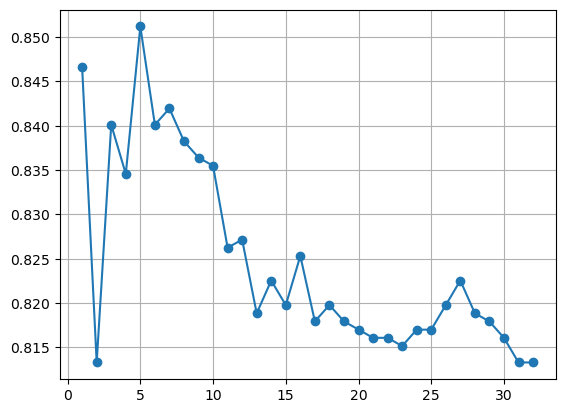

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import math

m = math.ceil(math.sqrt(len(X_latih)))
nilai_k = range(1,m)
skor_cv = []

for i in nilai_k:
    knn = KNeighborsClassifier(n_neighbors=i)
    skor = cross_val_score(knn,X_latih,y_latih.values.ravel(),cv=3,scoring='accuracy')
    skor_cv.append(skor.mean())

k = nilai_k[np.argmax(skor_cv)]
print("Nilai k yang optimal adalah {}".format(k))

plt.plot(nilai_k,skor_cv,marker='o')
plt.grid(True)
plt.show()

In [12]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_latih,y_latih.values.ravel())
y_pred = knn.predict(X_uji)

ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

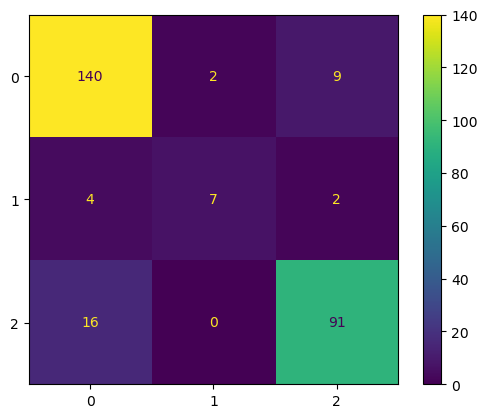

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_uji, y_pred)  # Pastikan y_uji dan y_pred sudah didefinisikan

# Step 3: Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Positive', 'Negative'])
disp.plot(cmap='viridis')
plt.show()


In [18]:
akurasi = accuracy_score(y_uji, y_pred)
hasil = classification_report(y_uji, y_pred)
print("Hasil akurasi dari klasifikasi adalah {:.2f}".format(akurasi))
print("Hasil evaluasi klasifikasi yang dilakukan adalah sebagai berikut")
print(hasil)

Hasil akurasi dari klasifikasi adalah 0.88
Hasil evaluasi klasifikasi yang dilakukan adalah sebagai berikut
              precision    recall  f1-score   support

          -1       0.88      0.93      0.90       151
           0       0.78      0.54      0.64        13
           1       0.89      0.85      0.87       107

    accuracy                           0.88       271
   macro avg       0.85      0.77      0.80       271
weighted avg       0.88      0.88      0.88       271

